In [19]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [20]:
num_levels = 2
a = qt.destroy(2)

a1 = qt.tensor([a, qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a])

In [84]:
omega_1 = 0
omega_2 = 20 * 2 * np.pi # 2pi MHz
omega_2 = 0

g = 10 * 2 * np.pi # 2pi MHz

H = omega_1 * a1*a1.dag() + omega_2 * a2*a2.dag() + g*(a1*a2.dag() + a2*a1.dag())

In [85]:
psi0 = qt.basis([num_levels, num_levels], [1, 0])
times = np.linspace(0, 0.5, 1001)

result = qt.sesolve(H, psi0, times, e_ops=[a1*a1.dag(), a2*a2.dag()])

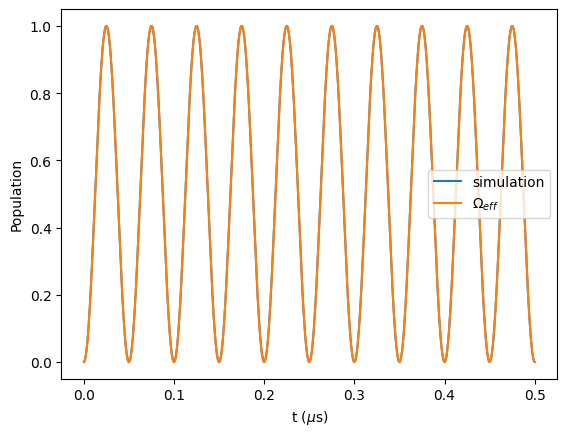

In [86]:
plt.plot(times, result.expect[0], label='simulation')

delta = omega_2 - omega_1
omega_eff = np.sqrt(4*np.power(g, 2) + np.power(delta, 2))
amplitude = np.power(g, 2)/(np.power(g, 2) + np.power(delta/2, 2))

plt.plot(times, amplitude*(1/2 - 1/2*np.cos(omega_eff*times)), label='$\Omega_{eff}$')

plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()